In [42]:
pip install librosa --user

Note: you may need to restart the kernel to use updated packages.


In [43]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

Using TensorFlow backend.


In [45]:
# Paths for data.
Ravdess = "E:/MPMD/Third Semester/Big Data/Presentation data/Ravdess/"
Crema = r"E:/MPMD/Third Semester/Big Data/Presentation data/Crema/AudioWAV/"
Tess = r"E:/MPMD/Third Semester/Big Data/Presentation data/TESS/TESS Toronto emotional speech set data/"
Savee = r"E:\MPMD/Third Semester/Big Data/Presentation data/Savee/ALL/"

## Ravdess

In [46]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  E:/MPMD/Third Semester/Big Data/Presentation d...
1  neutral  E:/MPMD/Third Semester/Big Data/Presentation d...
2  neutral  E:/MPMD/Third Semester/Big Data/Presentation d...
3  neutral  E:/MPMD/Third Semester/Big Data/Presentation d...
4     calm  E:/MPMD/Third Semester/Big Data/Presentation d...

## Crema

In [47]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  E:/MPMD/Third Semester/Big Data/Presentation d...
1  disgust  E:/MPMD/Third Semester/Big Data/Presentation d...
2     fear  E:/MPMD/Third Semester/Big Data/Presentation d...
3    happy  E:/MPMD/Third Semester/Big Data/Presentation d...
4  neutral  E:/MPMD/Third Semester/Big Data/Presentation d...

## TESS

In [48]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  E:/MPMD/Third Semester/Big Data/Presentation d...
1    angry  E:/MPMD/Third Semester/Big Data/Presentation d...
2    angry  E:/MPMD/Third Semester/Big Data/Presentation d...
3    angry  E:/MPMD/Third Semester/Big Data/Presentation d...
4    angry  E:/MPMD/Third Semester/Big Data/Presentation d...

## CREMA-D

In [49]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    angry  E:\MPMD/Third Semester/Big Data/Presentation d...
1    angry  E:\MPMD/Third Semester/Big Data/Presentation d...
2    angry  E:\MPMD/Third Semester/Big Data/Presentation d...
3    angry  E:\MPMD/Third Semester/Big Data/Presentation d...
4    angry  E:\MPMD/Third Semester/Big Data/Presentation d...

## Creating DataFrame based on the 4 above

In [50]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("E:/MPMD/Third Semester/Big Data/Presentation data/data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  E:/MPMD/Third Semester/Big Data/Presentation d...
1  neutral  E:/MPMD/Third Semester/Big Data/Presentation d...
2  neutral  E:/MPMD/Third Semester/Big Data/Presentation d...
3  neutral  E:/MPMD/Third Semester/Big Data/Presentation d...
4     calm  E:/MPMD/Third Semester/Big Data/Presentation d...

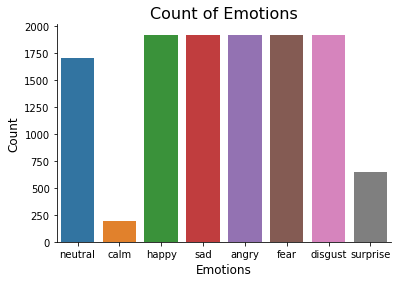

In [51]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [52]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

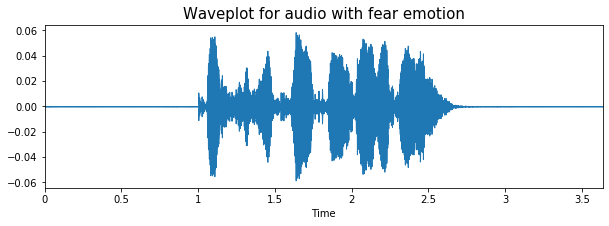

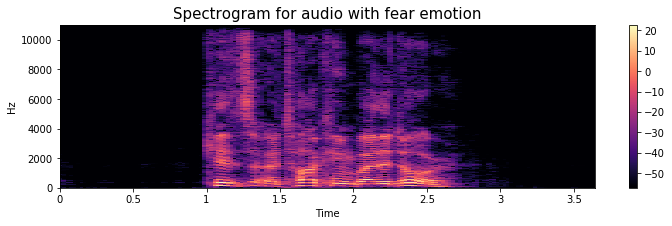

In [53]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

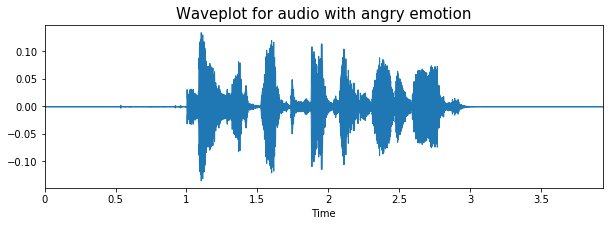

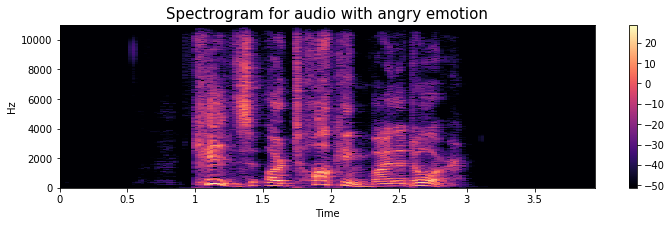

In [54]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

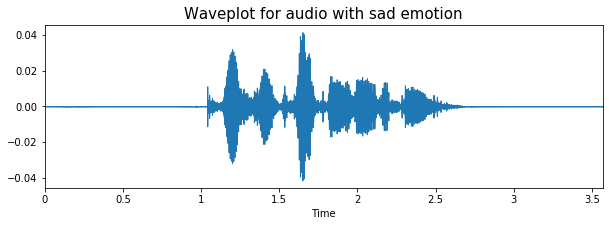

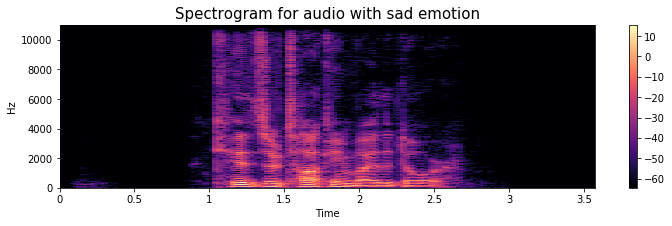

In [55]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

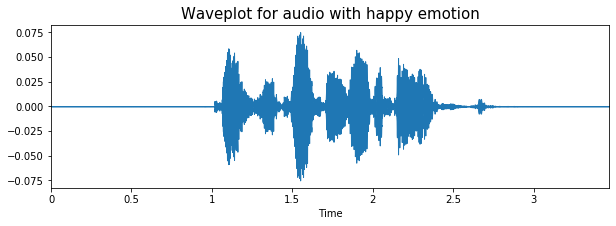

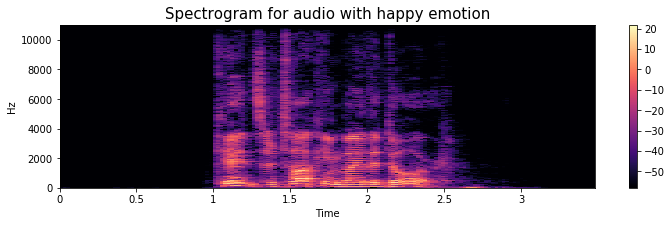

In [56]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentation


### Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.

In [57]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

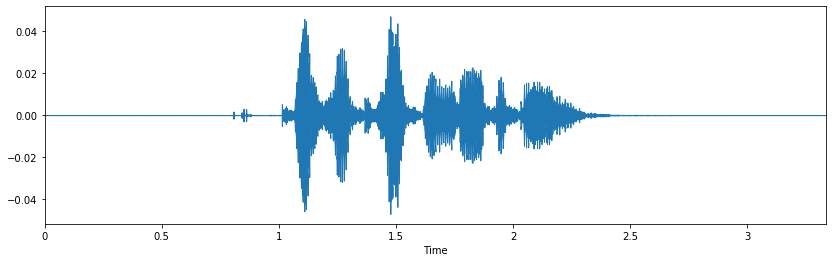

In [58]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

### Noise Injection

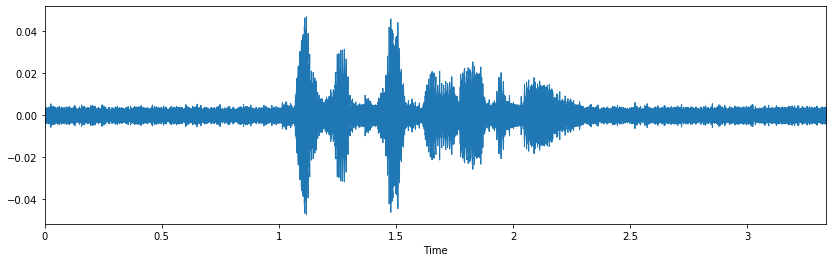

In [59]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### Stretching

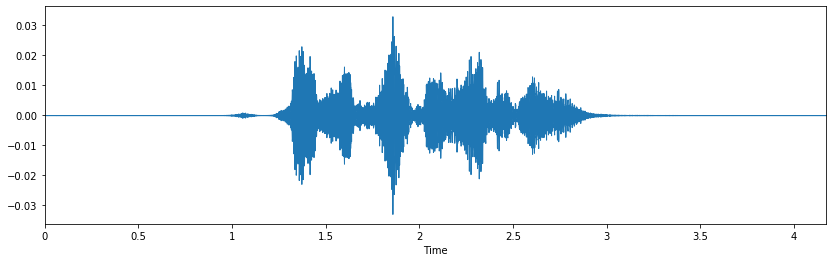

In [60]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### Shifting

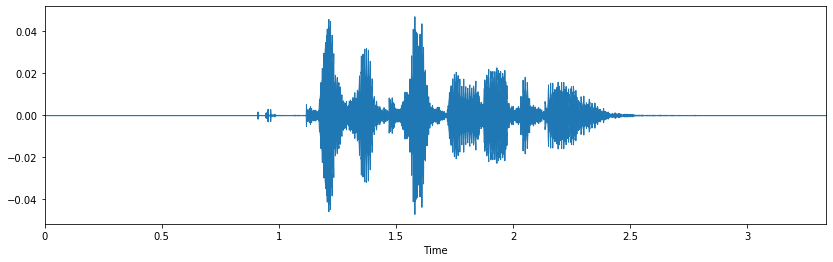

In [61]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### Pitch

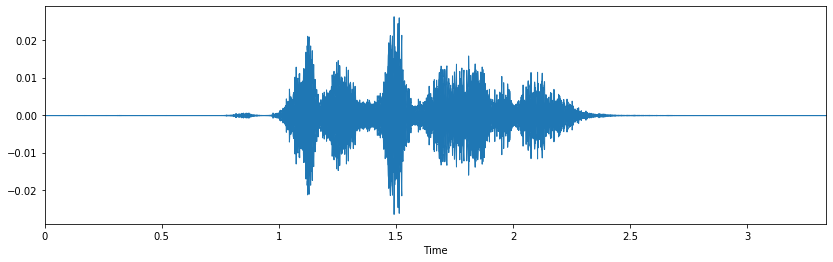

In [62]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Feature Extraction

In [63]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [64]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [65]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [66]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.300781  0.706492  0.756853  0.735217  0.731014  0.715156  0.667529   
1  0.312749  0.760569  0.820412  0.804381  0.798194  0.814510  0.756628   
2  0.176693  0.640605  0.712837  0.743736  0.714797  0.701402  0.694569   
3  0.271272  0.674966  0.723259  0.724594  0.681301  0.670643  0.674574   
4  0.334911  0.797905  0.837931  0.815182  0.798570  0.820188  0.721048   

          7         8         9  ...           153       154       155  \
0  0.673754  0.722173  0.748969  ...  4.319263e-06  0.000003  0.000002   
1  0.666473  0.688744  0.729988  ...  5.294698e-05  0.000052  0.000048   
2  0.663853  0.688527  0.742508  ...  7.999367e-07  0.000001  0.000001   
3  0.630036  0.680146  0.708276  ...  6.998011e-06  0.000007  0.000007   
4  0.659906  0.710913  0.747561  ...  1.605078e-04  0.000162  0.000169   

            156           157           158       159           160  \
0  2.286677e-06  5.131693e-06  8.065747e-06  0.000005  2.270858e-06   
1  4.628958e-05  5.116154e-05  5.260180e-05  0.000052  4.983124e-05   
2  5.350822e-07  3.480662e-07  8.398366e-07  0.000001  4.287777e-07   
3  6.999257e-06  1.217880e-05  9.449916e-06  0.000008  2.638513e-06   
4  1.594735e-04  1.528241e-04  1.576574e-04  0.000157  1.554520e-04   

            161   labels  
0  1.642365e-07  neutral  
1  4.383664e-05  neutral  
2  2.878995e-08  neutral  
3  1.788902e-07  neutral  
4  1.575502e-04  neutral  

[5 rows x 163 columns]

# Data Preparation

In [67]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [68]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [69]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [70]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [71]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

# Modeling

In [72]:
model=Sequential() #  A sequential model, as the name suggests, allows you to create models layer-by-layer in a step-by-step fashion.
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 81, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 128)         

In [73]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])


Train on 27364 samples, validate on 9122 samples
Epoch 1/50
27364/27364 [==============================] - 103s 4ms/step - loss: 1.6970 - accuracy: 0.3111 - val_loss: 1.4830 - val_accuracy: 0.4156
Epoch 2/50
27364/27364 [==============================] - 102s 4ms/step - loss: 1.4574 - accuracy: 0.4146 - val_loss: 1.3239 - val_accuracy: 0.4716
Epoch 3/50
27364/27364 [==============================] - 102s 4ms/step - loss: 1.3720 - accuracy: 0.4584 - val_loss: 1.2685 - val_accuracy: 0.4955
Epoch 4/50
27364/27364 [==============================] - 101s 4ms/step - loss: 1.3206 - accuracy: 0.4722 - val_loss: 1.2204 - val_accuracy: 0.5075
Epoch 5/50
27364/27364 [==============================] - 102s 4ms/step - loss: 1.2810 - accuracy: 0.4886 - val_loss: 1.1960 - val_accuracy: 0.5121
Epoch 6/50
27364/27364 [==============================] - 102s 4ms/step - loss: 1.2489 - accuracy: 0.5048 - val_loss: 1.1787 - val_accuracy: 0.5238
Epoch 7/50
27364/27364 [==============================] - 101s

9122/9122 [==============================] - 9s 1ms/step
Accuracy of our model on test data :  59.8443329334259 %


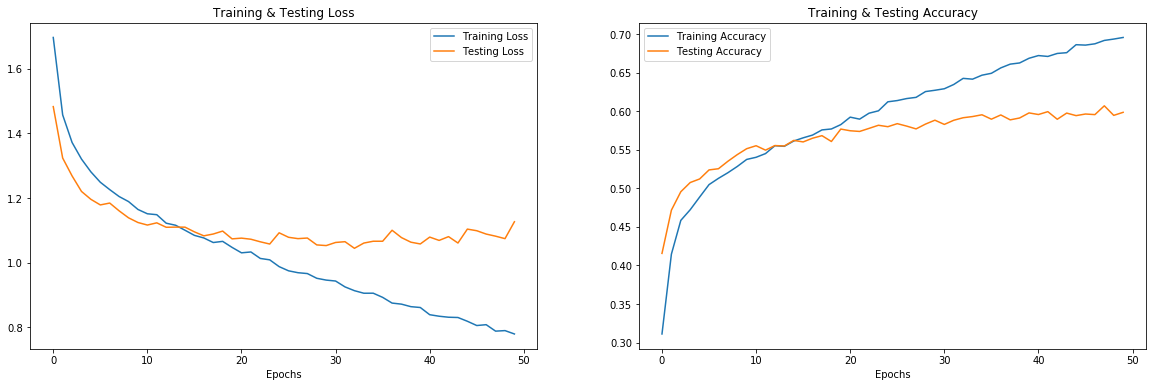

In [74]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [75]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [76]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'],dtype=object)
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad       disgust
1          disgust       disgust
2            angry         angry
3          disgust       disgust
4              sad          fear
5              sad          fear
6            happy         happy
7            happy         happy
8              sad           sad
9          neutral           sad

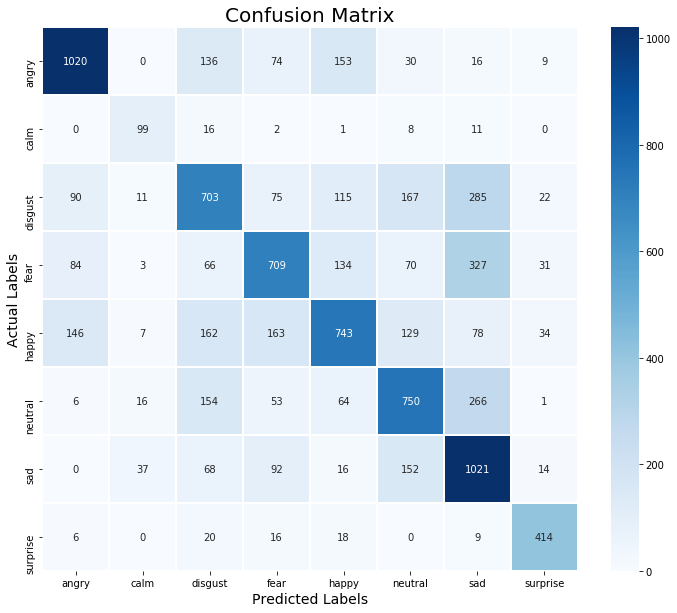

In [77]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [78]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       angry       0.75      0.71      0.73      1438
        calm       0.57      0.72      0.64       137
     disgust       0.53      0.48      0.50      1468
        fear       0.60      0.50      0.54      1424
       happy       0.60      0.51      0.55      1462
     neutral       0.57      0.57      0.57      1310
         sad       0.51      0.73      0.60      1400
    surprise       0.79      0.86      0.82       483

    accuracy                           0.60      9122
   macro avg       0.62      0.63      0.62      9122
weighted avg       0.60      0.60      0.60      9122



## Test My voice

In [87]:
My_Path = r'E:/MPMD/Third Semester/Big Data/Presentation data/NER_pixel_mohammad.wav'

In [88]:
custom_feature = get_features(My_Path)

In [89]:
custom_feature.shape

(3, 162)

In [90]:
scaler = StandardScaler()
custom_feature = scaler.fit_transform(custom_feature)

In [91]:
custom_feature = np.expand_dims(custom_feature, axis=2)


In [92]:
# predicting on custom.
pred_costom_audi = model.predict(custom_feature)


In [93]:
pred_costom_audi

array([[1.4419656e-01, 2.7114508e-25, 2.7749568e-02, 8.1685586e-03,
        8.1983560e-01, 4.5838111e-05, 3.8570283e-06, 7.2536103e-08],
       [4.9595755e-01, 3.3137104e-16, 2.9210028e-01, 3.3519927e-02,
        1.7255370e-01, 4.6428717e-03, 1.2256630e-03, 1.2884587e-08],
       [2.1876849e-03, 4.0628157e-17, 2.1746899e-01, 2.8645763e-01,
        1.6657356e-02, 1.0524004e-02, 4.6670434e-01, 2.8014648e-08]],
      dtype=float32)

In [94]:
pred_costom_audi_conv = encoder.inverse_transform(pred_costom_audi)

In [95]:
pred_costom_audi_conv.flatten()

array(['happy', 'angry', 'sad'], dtype=object)

# 0.61% Weighted avg Accuracy !!!

## Saving the model

In [96]:
model.save('seq_my_model')

## Loading the model

In [97]:
from tensorflow.keras.models import load_model

In [98]:
my_model = load_model('seq_my_model')

In [99]:
my_model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000012466B1C0C8>>

In [100]:
my_model.get_weights

<bound method Model.get_weights of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000012466B1C0C8>>

In [101]:
my_model.optimizer

# Sentiment Analysis

In [5]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install SpeechRecognition

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [1]:
import speech_recognition as sr
from pydub import AudioSegment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

C:\Users\Acer\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [7]:
import spacy

C:\Users\Acer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Acer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Acer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Acer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [36]:
recognizer = sr.Recognizer()
call_1_file = sr.AudioFile('E:/MPMD/Third Semester/Big Data/Presentation data/NER_pixel_mohammad.wav')
with call_1_file as source:
    call_1_audio = recognizer.record(call_1_file)
transcript = recognizer.recognize_google(call_1_audio)
print(transcript)

Muhammad love Google pixel phones


In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
sid = SentimentIntensityAnalyzer()

In [38]:
sentence = 'I hate you. I love you'
transcript

'Muhammad love Google pixel phones'

In [39]:
print(sid.polarity_scores(transcript))

{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}


In [9]:
!pip install -U spacy download en_core_web_sm

In [11]:
import en_core_web_sm
nlp = en_core_web_sm.load()

## Showing the NER

In [40]:
doc = nlp(transcript)
type(doc)

spacy.tokens.doc.Doc

In [41]:
for entity in doc.ents:
    print(entity.text, entity.label_)

Google ORG
